### Tarea 9.3

Ejercicio 4.4.17 libro de Burden de análisis numérico.

Determine con una precisión de $10^{-6}$ la longitud del gráfico de la elipse con ecuación $4x^2 + 9y^2 = 36$. Para esto use algún método de integración compuesta.

In [1]:
#Importacióm de paquetes a usar
import numpy as np
import matplotlib.pyplot as plt

Para graficar la elipse con la que se trata, se puede usar la ecuación paramétrica de cualquier elipse:

$$
x = u + a\cos(\theta) \quad y = v + b\sin(\theta)
$$

con $(u, v)$ el centro de la elise.

Considerando nuestro caso, los semiejes son:

$$
4x^2 + 9y^2 = 36 \Rightarrow \frac{x^2}{9} + \frac{y^2}{4} = 1
$$

Por lo tanto $a=3$ y $b=2$, entonces la integral queda:

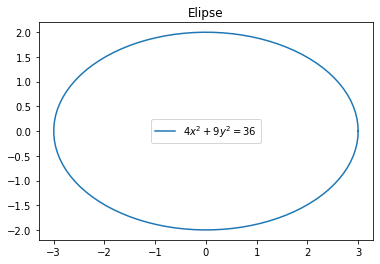

In [2]:
u=0     #posicion x central
v=0     #posición y central
a=3     #semieje mayor
b=2     #semieje menor

#Gráfica de la elipse
theta = np.linspace(0, 2*np.pi, 100)
plt.plot( u+a*np.cos(theta), v+b*np.sin(theta))
plt.legend(["$4x^{2} + 9y^{2} = 36$"])
plt.title('Elipse')
plt.show()

Si se considera una elipse cualquiera:

$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}=1
$$

Se puede obtener una longitud aproximada de esta usando la ecuación paramétrica centrada en $(0,0)$:

$$
x = a\cos(\theta) \quad y = b\sin(\theta)
$$

El arco de la elipse vendría dado por:

$$
ds = \sqrt{dx+dy} = \sqrt{a^2\sin^2(\theta)+b^2\cos^2(\theta)}\cdot d\theta
$$

Luego la integral sera:

$$
L = \int^{2\pi}_0 \sqrt{a^2\sin^2(\theta)+b^2\cos^2(\theta)}\cdot d\theta
$$

Y para calcularla se usará el método de romberg

In [3]:
#Integracion compuesta de Romberg
def romberg(f, a, b, n):
    
    R0 = np.zeros(n)
    R1 = np.zeros(n)
    
    h = (b - a)
    R0[0] = (h/2)*(f(b) + f(a))
    for i in range(1, n):
        s = sum(f(a + (k - 0.5)*h) for k in range(1, int(2**(i-1)) + 1))
        R1[0] = (1/2)*(R0[0] + h*s) # aproximación trapezoidal papra este h
        for j in range(1, i+1):
            R1[j] = R1[j-1] + (R1[j-1] - R0[j-1])/(4**(j) - 1)
        h = h/2
        for j in range(i+1):
            R0[j] = R1[j]
            
    return R0[-1]

In [4]:
def funcion(theta): #Definición de función a integrar
    return (a**2 * np.sin(theta)**2 + b**2 * np.cos(theta)**2)**(1/2)

In [5]:
#Integración con el método de Romberg
romberg(funcion, 0, 2*np.pi, 20)

15.86543958929075

Finalmente se logró encontrar el valor para la longitud de la función de elipse, este valor es correspondiente a $\approx 15.86544$